## Importations

In [13]:
import numpy as np
import math as m
import scipy.constants as constants
import scipy.special as specials
import matplotlib.pyplot as plt
%matplotlib notebook

# Kuiper's belt gravitational field $\vec{K}(\vec{r})$ under Newton's potential

In [2]:
def Kuiper_Newton(x, y, z, 
                  mu = 1.97 * 3986004418 * 10**3, ecliptic_plane_angle_x = (23.4 + 1.86) * 2 * m.pi / 360,
                  R_center = 45 * constants.au, R0 = 16 * constants.au):
    """ The position of the mass is expressed in cartesian coordinates in the solar system's reference frame"""
    xp = x
    yp = y * m.cos(ecliptic_plane_angle_x) + z * m.sin(ecliptic_plane_angle_x)
    zp = -y * m.sin(ecliptic_plane_angle_x) + z * m.cos(ecliptic_plane_angle_x)
    rpp = m.sqrt(yp**2 + xp**2)
    if yp >= 0:
        thetapp = m.acos(xp / rpp)
    else :
        thetapp = - m.acos(xp / rpp)
    zpp = zp
    
    r0 = R0 / R_center
    rho = rpp / R_center
    xi = zpp / R_center
    M = (4  * rho) / ((rho + 1)**2 + xi**2)
    
    K = specials.ellipk(M)
    E = specials.ellipe(M)
    Kp = (K - specials.ellipk(M - 0.000001))/0.000001
    Ep = (E - specials.ellipe(M - 0.000001))/0.000001
    
    U = np.sqrt(M / rho) * (1 - r0**2 / 16)
    V = - np.sqrt(M / rho) * r0**2 / 16
    S = (rho**2 + xi**2 - 1) / ((rho + 1)**2 + xi**2)
    
    potentiel = mu / (m.pi * R_center) * (U * K + V * S * E)
    
    Upr = (1 - r0**2 / 16) * (-1) * (1 + rho) * np.sqrt(M / rho) * M / (4 * R_center * rho)
    Vpr = - r0**2 / 16 * (-1) * (1 + rho) * np.sqrt(M / rho) * M / (4 * R_center * rho)
    Spr = M / (2 * R_center) - (1 + rho) * S * M / (2 * R_center * rho)
    dm_dr = (M - (1 + rho) * M**2 / 2) / (R_center * rho)
    Krpp = (Upr * K + U * Kp * dm_dr + Vpr * S * E + V * Spr * E + V * S * Ep * dm_dr)
    Krpp *=  mu / (m.pi * R_center)
    
    Upz = (1 - r0**2 / 16) * (-1) * np.sqrt(M / rho) * xi * M / (4 * R_center * rho)
    Vpz = - r0**2 / 16 * (-1) * np.sqrt(M / rho) * xi * M / (4 * R_center * rho)
    Spz = xi * M / (2 * R_center * rho) - xi * S * M / (2 * R_center * rho)
    dm_dz = - xi * M**2 / (2 * R_center * rho)
    Kzpp = (Upz * K + U * Kp * dm_dz + Vpz * S * E + V * Spz * E + V * S * Ep * dm_dz)
    Kzpp *=  mu / (m.pi * R_center)
    
    Ktethapp = 0
    
    Kx = m.cos(thetapp) * Krpp
    Ky = m.sin(thetapp) * m.cos(ecliptic_plane_angle_x) * Krpp - m.sin(ecliptic_plane_angle_x) * Kzpp
    Kz = m.sin(thetapp) * m.sin(ecliptic_plane_angle_x) * Krpp + m.cos(ecliptic_plane_angle_x) * Kzpp
    
    return(potentiel, Kx, Ky, Kz) # enlever le retour de potentiel en pratique

<IPython.core.display.Javascript object>


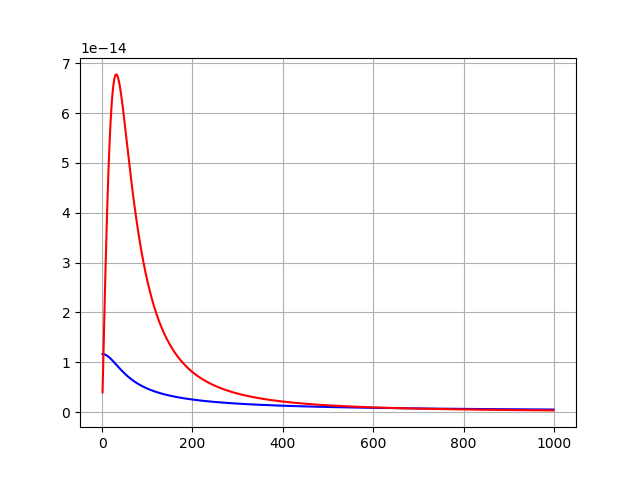

In [15]:
plt.figure(1)
plt.grid()
X, Y, Z = [], [], []
for i in range(1, 1000):
    X.append(i)
    potentiel, fx, fy, fz = Kuiper_Newton(1, 0, - i * constants.au, ecliptic_plane_angle_x = 0)
    Y.append(fz)
    Z.append(potentiel * 10**(-14))
plt.plot(X, Z, 'b')
plt.plot(X, Y, 'r')
plt.show()

J'ai le sentiment qu'il y a toujours une erreur quelque part, mais je n'arrive plus à le prouver...